<a href="https://colab.research.google.com/github/comsa33/AI_07_session_1_project_-/blob/main/ai_07_%E1%84%8B%E1%85%B5%E1%84%85%E1%85%AE%E1%84%8B%E1%85%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic') 

path = "/content/drive/MyDrive/vgames2.csv"

df_vgames = pd.read_csv(path, index_col=0)

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df_vgames.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
cols = df_vgames.columns
for col in cols:
    missing_rate = df_vgames[col].isna().sum()/df_vgames.shape[0]
    if missing_rate > 0:
        print('[{}]의 결측치 비율은 {}% 입니다'.format(col, round(missing_rate*100,4)))

[Year]의 결측치 비율은 1.6327% 입니다
[Genre]의 결측치 비율은 0.3012% 입니다
[Publisher]의 결측치 비율은 0.3494% 입니다


In [6]:
df_new = df_vgames.fillna('Unknown')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16598 non-null  object
 3   Genre        16598 non-null  object
 4   Publisher    16598 non-null  object
 5   NA_Sales     16598 non-null  object
 6   EU_Sales     16598 non-null  object
 7   JP_Sales     16598 non-null  object
 8   Other_Sales  16598 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [7]:
df_new[cols[5]]

1        0.04
2        0.17
3           0
4        0.04
5        0.12
         ... 
16594    0.15
16595    0.01
16596    0.44
16597    0.05
16598       0
Name: NA_Sales, Length: 16598, dtype: object

In [8]:
def unify_num(string):
    if 'K' in string:
        new_string = string.replace('K', '')
        return float(new_string)*0.01
    elif 'M' in string:
        new_string = string.replace('M', '')
        return float(new_string)
    else:
        return float(string)

In [9]:
df_new[cols[5:]] = df_new[cols[5:]].applymap(unify_num)

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  object 
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.3+ MB


In [11]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [12]:
df_new['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', 'Unknown'], dtype=object)

In [13]:
df_new['Genre'] = df_new['Genre'].astype("category")
df_new['Platform'] = df_new['Platform'].astype("category")

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16598 non-null  object  
 1   Platform     16598 non-null  category
 2   Year         16598 non-null  object  
 3   Genre        16598 non-null  category
 4   Publisher    16598 non-null  object  
 5   NA_Sales     16598 non-null  float64 
 6   EU_Sales     16598 non-null  float64 
 7   JP_Sales     16598 non-null  float64 
 8   Other_Sales  16598 non-null  float64 
dtypes: category(2), float64(4), object(3)
memory usage: 1.0+ MB


In [14]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [15]:
df_new['Total_Sales'] = df_new[cols[5:]].sum(axis=1)
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [16]:
len(df_new['Publisher'].unique())

578

In [17]:
def year2str(year):
    if year == 'Unknown':
        return year
    elif int(year) <= 21:
        year = 2000+int(year)
    elif int(year) < 100 and int(year) > 50:
        year = 1900+int(year)
    return str(int(year))

In [18]:
df_new['Year'] = df_new['Year'].apply(year2str)

In [19]:
set(df_new['Year'].values)

{'1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 'Unknown'}

In [20]:
year_genre_df = pd.crosstab(df_new['Year'], df_new['Genre'])
year_genre_df

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown
Year,,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0,1
1981,25,0,0,0,3,2,1,0,10,1,4,0,0
1982,18,0,0,1,5,3,2,0,5,0,2,0,0
1983,7,1,0,1,5,1,0,0,1,0,1,0,0
1984,1,0,0,1,1,3,3,0,3,0,2,0,0
1985,2,0,1,0,4,4,0,0,1,1,1,0,0
1986,6,0,0,0,6,0,1,1,4,0,3,0,0
1987,2,1,2,0,2,0,0,3,2,0,4,0,0
1988,2,0,0,0,4,1,1,3,1,1,2,0,0


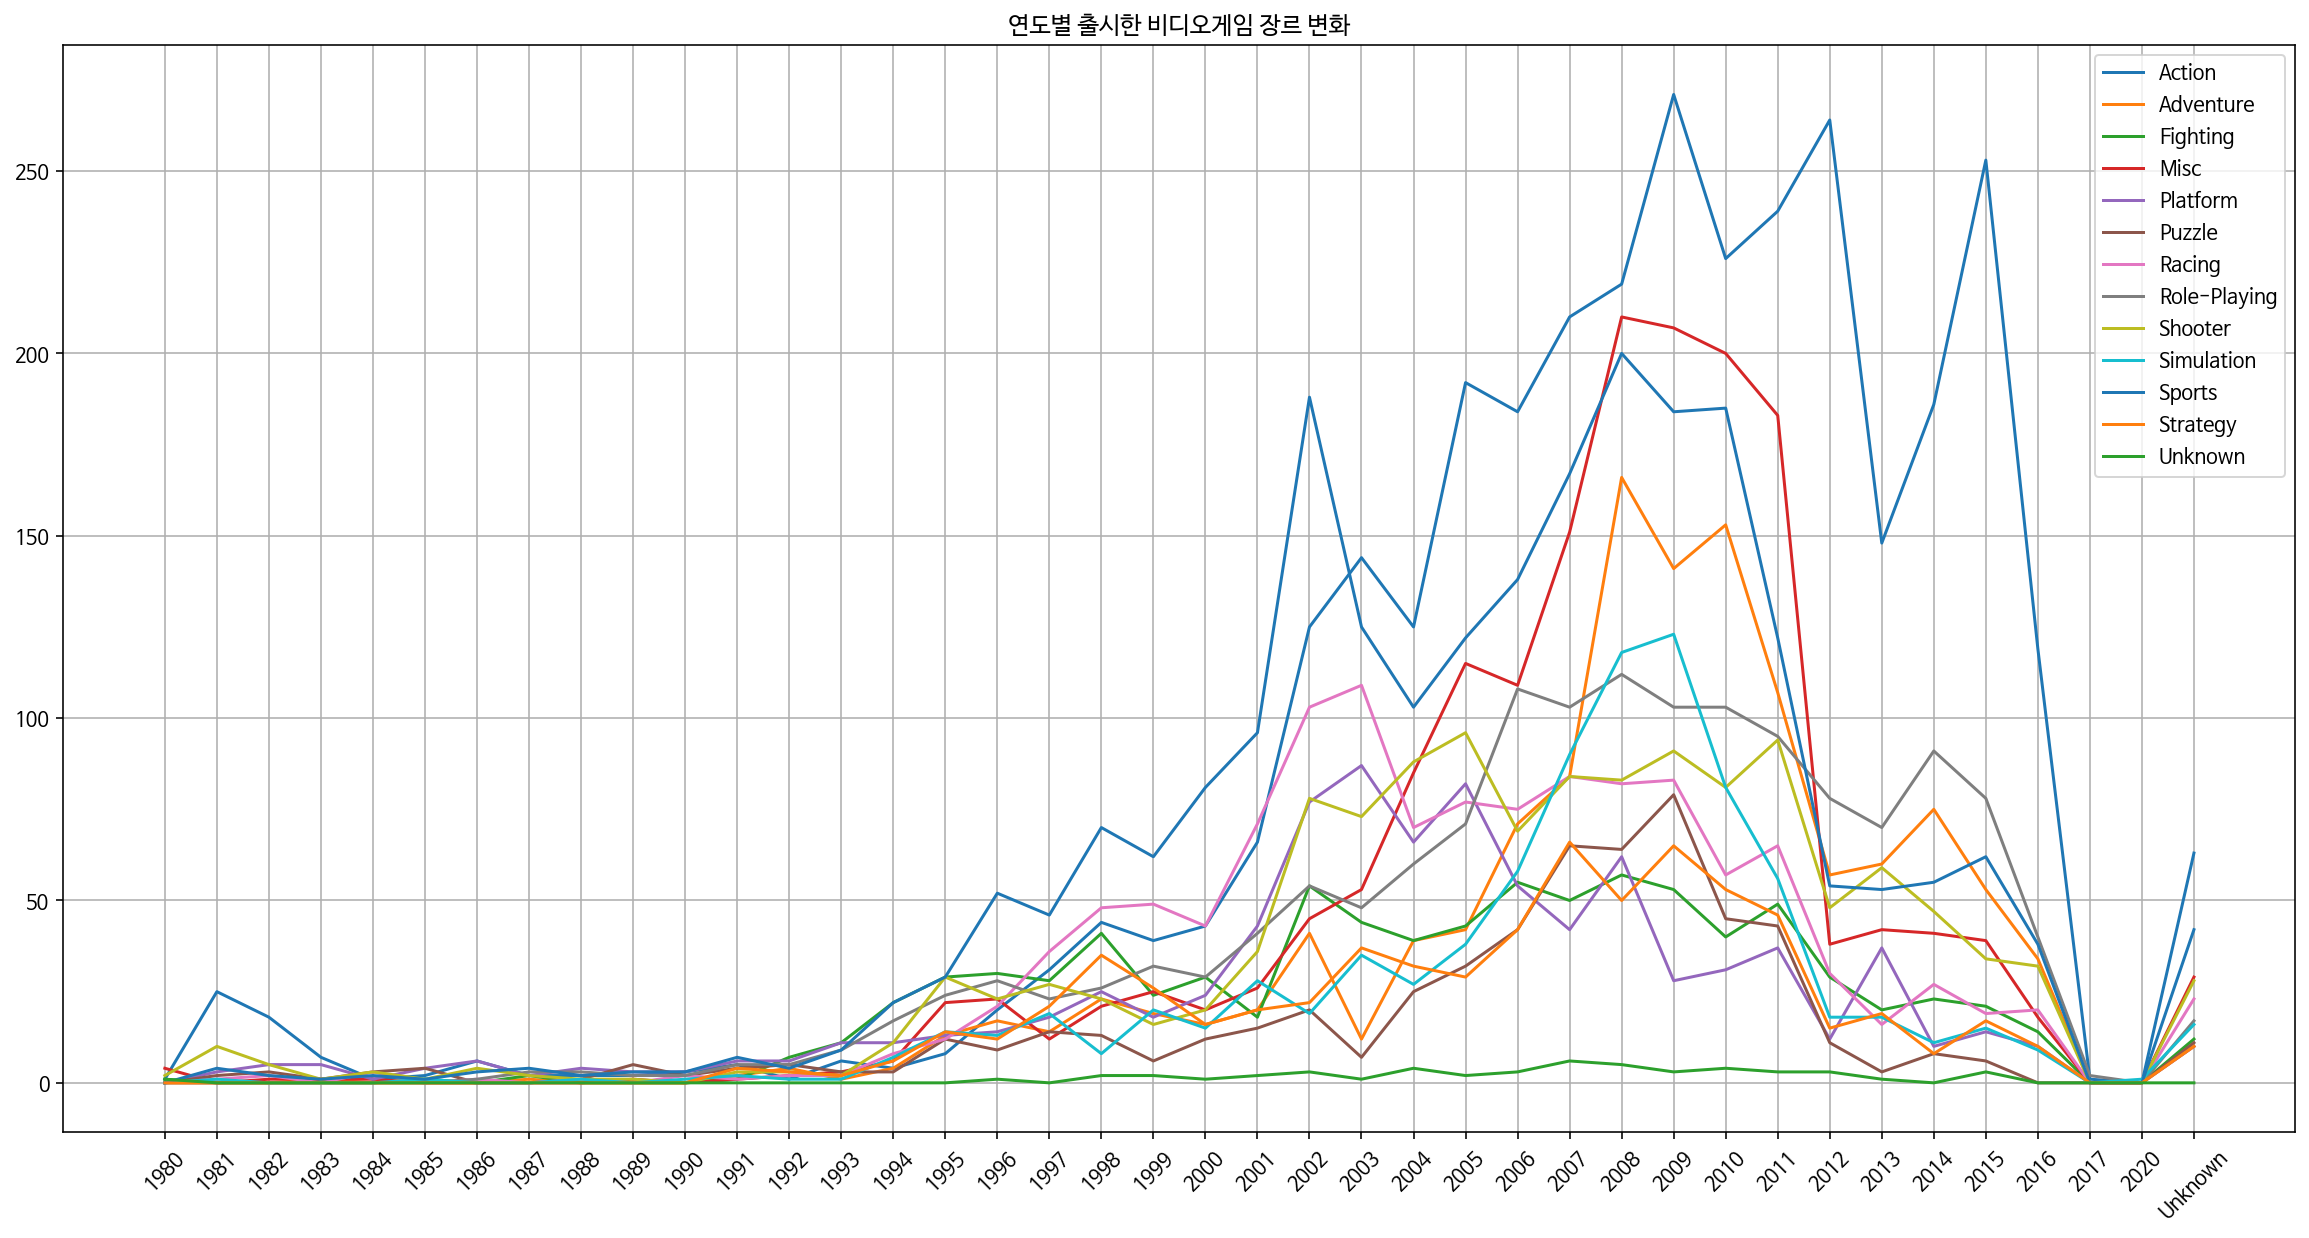

In [43]:
plt.figure(figsize=(20,10))
plt.plot(year_genre_df)
plt.xticks(rotation=45)
plt.legend(year_genre_df.columns)
plt.grid()
plt.title('연도별 출시한 비디오게임 장르 변화')
plt.show()

In [22]:
genre_region_df = pd.concat((df_new[cols[3]], df_new[cols[5:9]]), axis=1)
genre_region_df.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04


In [23]:
genre_region_df = genre_region_df.groupby(by='Genre', axis=0).sum()
genre_region_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,938.08,561.58,168.43,194.64
Adventure,108.09,65.31,52.49,17.53
Fighting,230.49,113.73,88.96,37.90
Misc,441.89,231.62,107.34,75.21
Platform,476.23,213.22,132.54,54.95
Puzzle,127.13,51.18,56.87,12.52
Racing,406.60,242.77,58.74,80.16
Role-Playing,330.43,183.85,379.42,63.53
Shooter,606.31,343.11,38.64,105.71


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


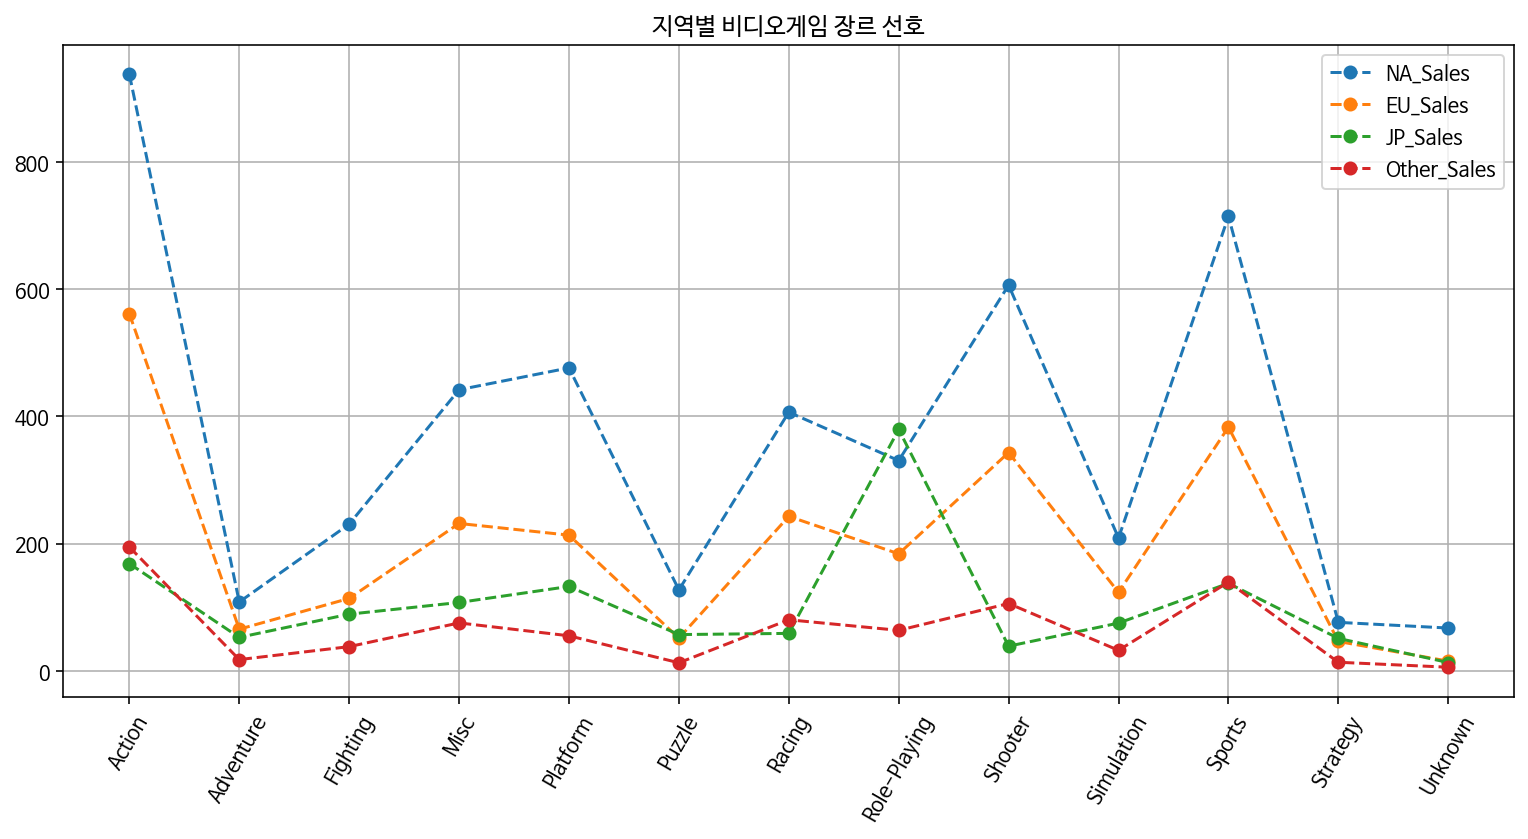

In [42]:
plt.figure(figsize=(13,6))
plt.plot(genre_region_df, 'o--')
plt.xticks(rotation=60)
plt.legend(genre_region_df.columns)
plt.title('지역별 비디오게임 장르 선호')
plt.grid()
plt.show()